# TRABAJO SEMANA 4.

# S1- CASO PRACTICO

# MATERIA:
   ### ANALISTICA PREDICTIVA

# TEMA:
   ###  S4- CASO PRACTICO-BDD FINAL

     
# ESTUDIANTE:
   ### SANTIAGO FERNANDO PACHECO ESTRELLA.

1. Importe la base de datos a una base en Jupyter Notebook con pandas. 
2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 
3. Evalúe si la base contiene datos perdidos.
4. Evalúe si alguna de las variables contiene datos atípicos (outliers) 
    - De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 
5. Grafique las distribuciones de las vsriables y a priori comente sobre ellas. 
6. Obtenga las correlaciones entre los datos de corte numérico. 
7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.
8. Indique que tipo de modelación realizarán y porqué. 
9. Verifique los supuestos, de haber escogido el enfoque econométrico. 
10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.
11. Grafique a los valores predicho de modelo vs los valores reales.
    - ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 
12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 
13. Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 

### Desarrollo del problema

In [238]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [239]:

df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo 

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


En resumen tenemos identifciad 5 columnas de valor númerico decimal, 2 numericos valor entero y una de valor cualitativa.

El número de la tienda es un valor entero como un identificador y aun cuando es numérico es una variable categórica.
La fecha aparece como una variable cualitativa, y única que será necesario transformar para un mejor entendimiento y analisis. 
La columna Holiday aparece como número entero y es un flag donde identifica Yes o No de identificar si es festivo que ya se encuentra codificado. 

El número total de registros es 6435 entradas con 8 columnas. 



In [241]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Date: 143
Weekly_Sales: 6435
Holiday_Flag: 2
Temperature: 3528
Fuel_Price: 892
CPI: 2145
Unemployment: 349


In [242]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df['Day'] = df['Date'].dt.weekday
#df['Weekday'] = df['Date'].dt.strftime("%d")
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


### 3. Evalúe si la base contiene datos perdidos.

In [243]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [244]:
df.duplicated().sum()

0


Por ende, la base no tiene valores duplicados ni valores perdidos. 

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers) 

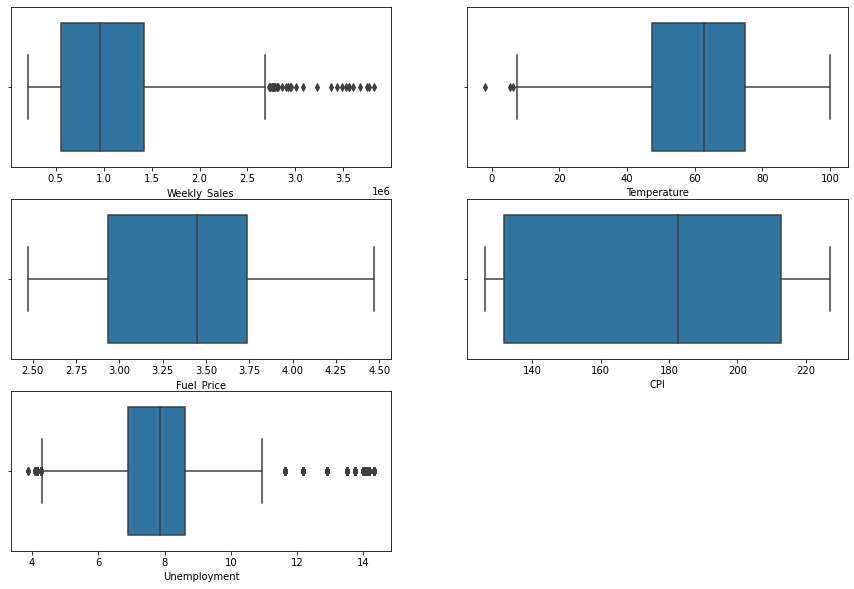

In [245]:
#checking outliers with the Boxplot

n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [246]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


- La columna de weekly_sales  tiene valores atípicos.
- La columna de temperature tiene algunos valores negativos.
- La columna del CPI tiene valores atípicos


Para poder eliminar los valores atípicos se utlizar el rango intercuartílico, para detectar y eliminar los outliers. Se calculará el rango entre el primer cuartil (Q1) y el tercer cuartil (Q3) para considerlos como outliers los valores que están fuera del rango específicado.

In [247]:

import numpy as np # linear algebra

Outliers = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(Outliers):
    for i in Outliers:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(Outliers)

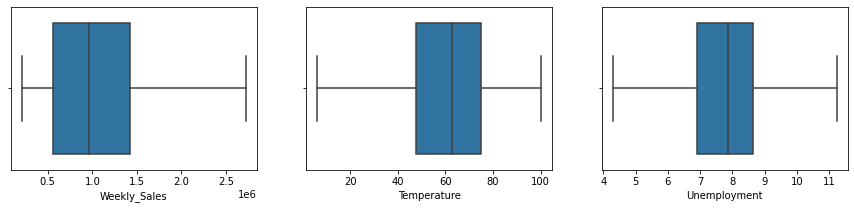

In [248]:
# Verificar los nuevos valores graficamente. 
n = 1
cols =["Weekly_Sales","Temperature","Unemployment"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas.

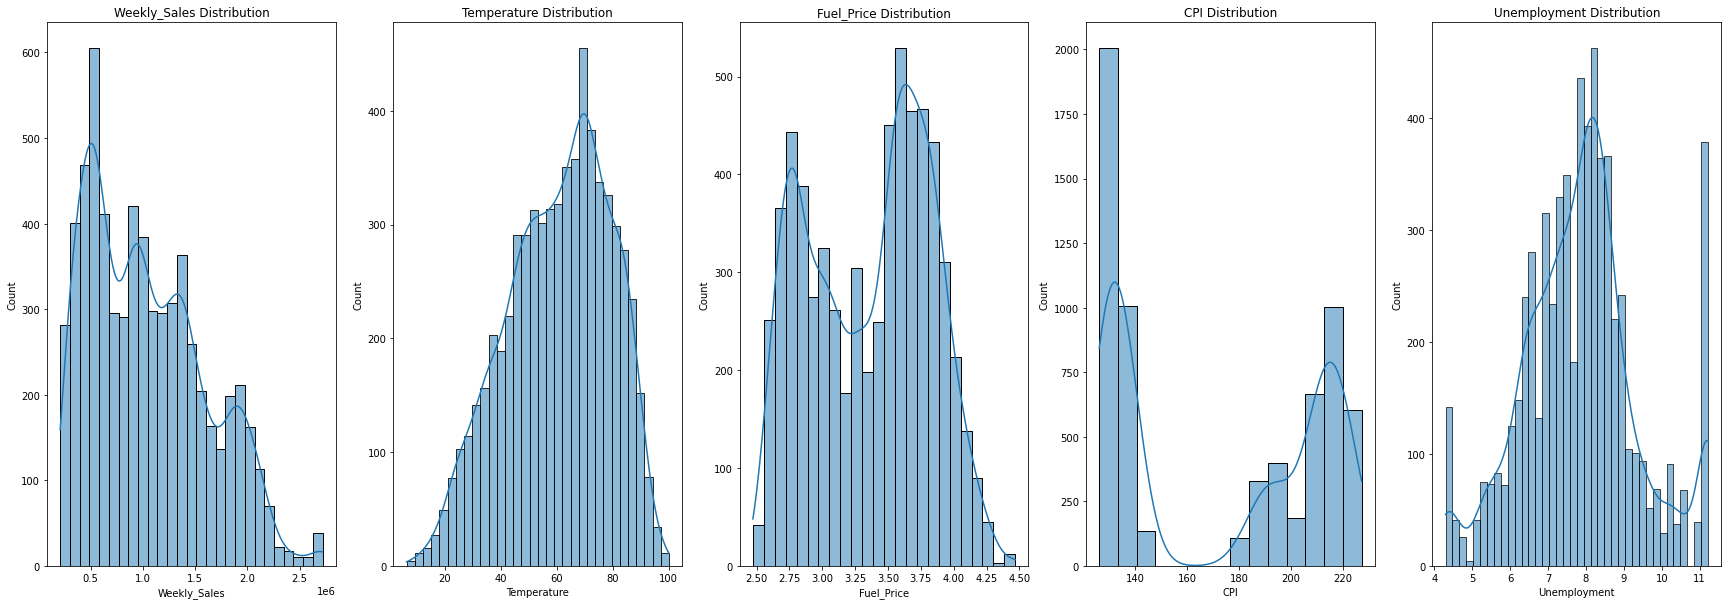

In [249]:
fig , ax = plt.subplots(1,5,figsize=(30,10))
cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
for i,col in enumerate(cols):
    sns.histplot(df,
                 x=col,
                 ax=ax[i],
                 kde=True,
                )
    ax[i].set_title(f'{col} Distribution')
fig.show() 

- Las columnas de CPI y Fuel_price tiene una distribución binomial. 
- Las columnas de Temperature y Unemplyment tienen una distribución normal. 
- La Columna de Weekly_sales mas adelante se definirá como nuestra variable dependiente, esta será que se pronostique en función de todas las variables independientes.


<Figure size 1080x864 with 0 Axes>

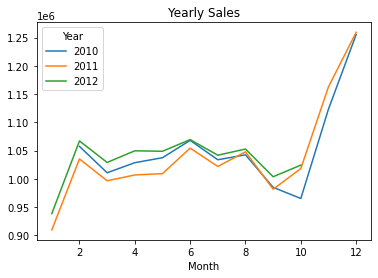

In [250]:
df2 = df.copy()
df2.head()

plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df2, index = "Month", columns = "Year", values = "Weekly_Sales")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

In [251]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df2['Day'] = df2['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df2['Month']= df2['Month'].map(months)
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Thursday,February,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,February,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Thursday,March,2010


### 6. Obtenga las correlaciones entre los datos de corte numérico.

In [252]:
df2.corr(numeric_only = True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01
Year,3.474318e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00


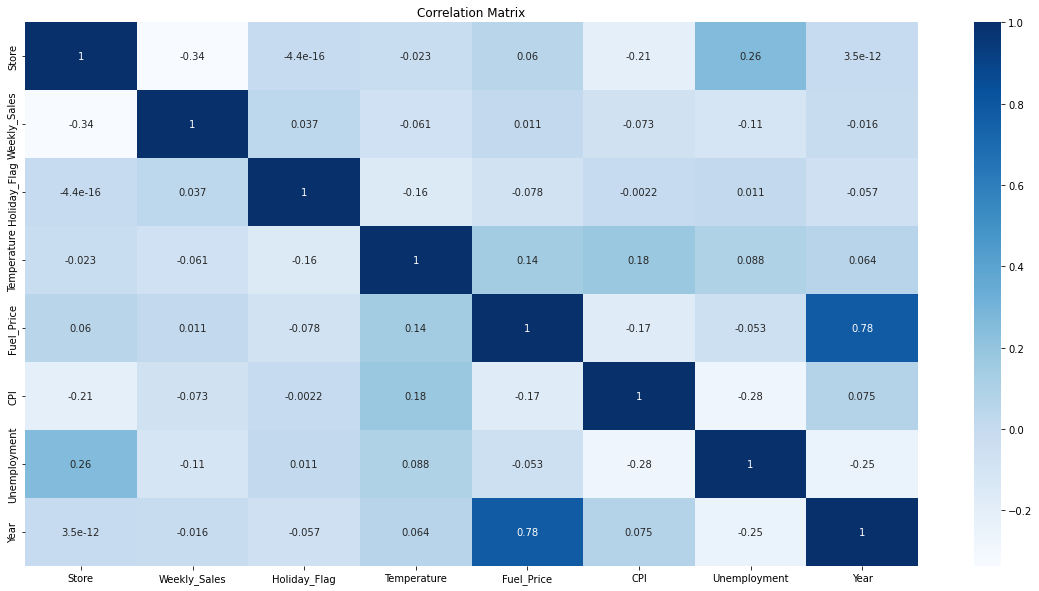

In [253]:
#Representacion gráfica de la correlación 

plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(numeric_only = True),annot=True,cmap ="Blues")
plt.title('Correlation Matrix')
plt.show()

### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

El Dataset Contiene la ventas semanales de la tienda walmart y esta se ve afectada por todas las otras variables independientes, se puede identificar que puede surtir un efectos si varia la temperarura, si es festivo o no, el precio de combustible, el índice de precio de los articulos y la tase de desempleo, afecta notablemente en las ventas semanas. 
Si bien en la matrix de correlación noexiste un valor muy alto que sea el cambio significativo, existen valores que se pueden modelar para determinar lo que afectan a las ventas semanales (Weekly_sales).
Las ventas se afectan según la tienda o si es festivo o no, en donde se encuentran los valores mas grandes. 

### 8. Indique que tipo de modelación realizarán y porqué. 

Uno de los modelos estadisticos es el econométrico que generalmente se usa para pronosticar o predecir una variable dependiente en funcion de las independientes. 
Para el caso de estudio se traduce en predecir las ventas en función de variables predictoras (indice de precio, dias festivos, desempleo, Precio combustible, Temperatura del dia. ), además de encontrar la relación saber que tanto influyen en el modelo para el pronóstico de sus ventas.


### 9. Verifique los supuestos, de haber escogido el enfoque econométrico.

Será necesario verificar los supuestos entre las variables independientes , es el caso del indice de precio o desempleo con la variable dependiente que es las Ventas. 

In [254]:
from statsmodels.formula.api import ols

regresion1=ols("Weekly_Sales~CPI+Holiday_Flag+Temperature+Unemployment",data=df)
               #+Holiday_Flag+Temperature+CPI+Unemployment")
results1=regresion1.fit()
# aplicar el metodo fit.
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     41.71
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.40e-34
Time:                        05:01:35   Log-Likelihood:                -94188.
No. Observations:                6435   AIC:                         1.884e+05
Df Residuals:                    6430   BIC:                         1.884e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.737e+06   5.62e+04     30.901   

Despues de 6435 observaciones, se explica que el R^2 si bien no penaliza por utilizar mas variables en el modelo, este se acerca a 0, por lo que explica una menor cantidad de variabilidad.
respecto al Prob (f-statistica) es un valor muy pequeño a cero, por lo que sugiere que el modelo en su conjunto es significativo. 
Los coehficientes son diferentes de cero. 
Por la probabilidad que es menor que 0.05, se puede decir que las variables CPI, Holiday_Flag, y Unemplyment, 
Para la prueba de Kurtosis, es cercana a 3, para cumplir con el supuesto de normalidad. 

Grafica de modelo de regresión 


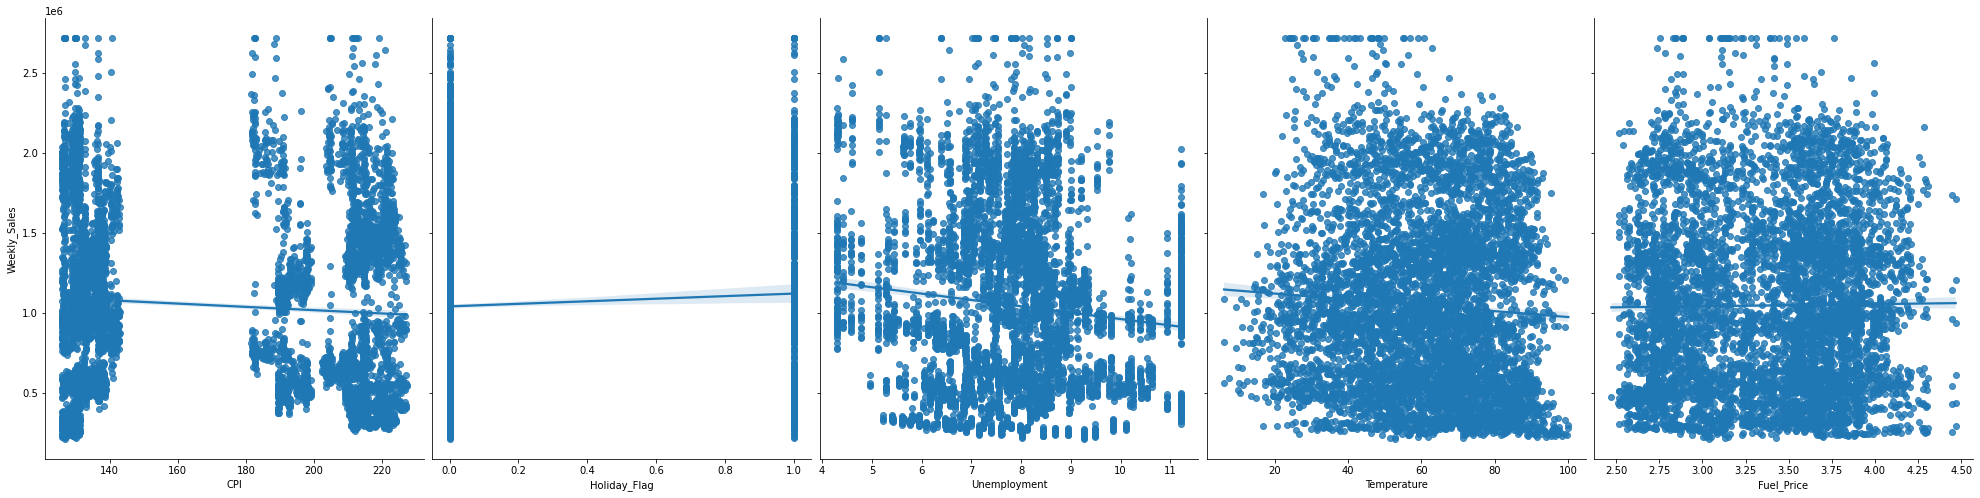

In [255]:
print ( "Grafica de modelo de regresión ")
sns.pairplot(df, x_vars=['CPI','Holiday_Flag','Unemployment','Temperature','Fuel_Price'], y_vars='Weekly_Sales', size=7, aspect=0.8,kind = 'reg')

### 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [256]:
#x = df.drop(['Weekly_Sales'],axis=1)
x = df[df.columns.difference(['Weekly_Sales'])]
y = df.Weekly_Sales

print ("Impresion de la variable independientes,\n", x)

print ("impesion de la variable dependiente - Precio \n",y)


Impresion de la variable independientes,
              CPI  Day  Fuel_Price  Holiday_Flag  Month  Store  Temperature  \
0     211.096358    4       2.572             0      2      1        42.31   
1     211.242170    4       2.548             1      2      1        38.51   
2     211.289143    4       2.514             0      2      1        39.93   
3     211.319643    4       2.561             0      2      1        46.63   
4     211.350143    4       2.625             0      3      1        46.50   
...          ...  ...         ...           ...    ...    ...          ...   
6430  192.013558    4       3.997             0      9     45        64.88   
6431  192.170412    4       3.985             0     10     45        64.89   
6432  192.327265    4       4.000             0     10     45        54.47   
6433  192.330854    4       3.969             0     10     45        56.47   
6434  192.308899    4       3.882             0     10     45        58.85   

      Unemployment  Y

In [257]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()

x_scaled = st.fit_transform(x)


In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 123)

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [260]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [261]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,RandomForestRegressor]]


-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 266044801571.4599
MAE: 428778.05198538944
R2 : 14.37 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 15841597584.742977
MAE: 67578.9940206876
R2 : 94.9 %


Por la siguiente definición:
- R² = 0: El modelo de regresión no explica ninguna variación en los datos y no es útil para hacer predicciones.

- R² = 1: El modelo de regresión explica toda la variación en los datos y se ajusta perfectamente a los datos observados.

- 0 < R² < 1: El modelo explica una parte de la variabilidad en los datos. Cuanto más cercano a 1 esté R², mejor se ajusta el modelo a los datos.

Para el modelo de regresion lineal tengo un valor de 0.14 y para de Random Forest el valor es de 0.94, muy cerca a 1, por lo que explica que los datos se ajustan bastante bien a los datos observados este modelo. 

Respecto a los Valores del Error cuadrático Medio (MSE), entre las predicciones del modelo para regresion lineal y Random forest, el menor valor es para este ultimo, indicando que mejor será el rendimiento del modelo , ya que se ajusta de manera mas cercana a los valores reales.


### 11. Grafique a los valores predicho de modelo vs los valores reales.
 -¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

In [262]:
#x = df.drop(['Weekly_Sales'],axis=1)
#y = df['Weekly_Sales']

#print ("Impresion de la variable independientes,\n", x)
#print ("impesion de la variable dependiente - Precio \n",y)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 123)

print("X_train", x_train.shape,"",type(x_train))
print("y_train",y_train.shape,"\t ",type(y_train))
print("X_test",x_test.shape,"",type(x_test))
print("y_test",y_test.shape,"\t ",type(y_test))

X_train (5148, 9)  <class 'numpy.ndarray'>
y_train (5148,) 	  <class 'pandas.core.series.Series'>
X_test (1287, 9)  <class 'numpy.ndarray'>
y_test (1287,) 	  <class 'pandas.core.series.Series'>


In [263]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo Random Forest
model_rf = RandomForestRegressor()

# Entrenar el modelo con tus datos de entrenamiento estandarizados
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [264]:
# Realizar las predicciones
#Ahora se puede utilizar para hacer las predicciones en el conjunto de prueba. 

pred_train = model_rf.predict(x_train)
pred_test = model_rf.predict(x_test)  #.-- usado para el modelo. 

In [265]:
print("Resultado de los datos de prueba para el entrenamiento")
pred_test

Resultado de los datos de prueba para el entrenamiento


array([1378022.3581, 1419629.0572,  287113.7913, ...,  418728.7881,
        644430.3622,  573498.4956])

In [266]:
print("Resultado de los datos del entrenamiento")
pred_train

Resultado de los datos del entrenamiento


array([ 675044.3139,  980048.7671,  718909.5105, ..., 1858790.9511,
        708943.6151,  911709.0144])

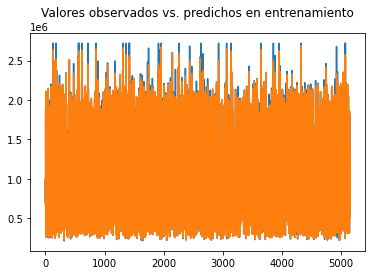

In [267]:

#betas  de los valores observado de los datos de entrenamiento
fig, ax = plt.subplots()
ax.plot(y_train.values) #azul observado 
ax.plot(pred_train)    # naranja lo predicho. 

plt.title("Valores observados vs. predichos en entrenamiento");

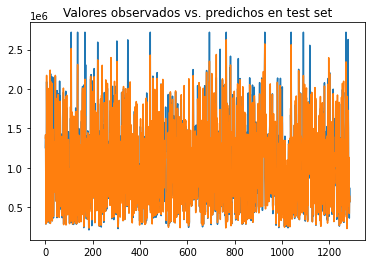

In [268]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(pred_test)
plt.title("Valores observados vs. predichos en test set");

### 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

In [269]:
# Obtener la importancia de las variables
importancias = model_rf.feature_importances_
importancias

array([0.1611773 , 0.        , 0.0122857 , 0.00387684, 0.02337553,
       0.68183867, 0.01592872, 0.09949999, 0.00201725])

In [270]:
# Obtener los nombres de las variables
nombres_variables = df.columns.delete(1)

#nombres_variables = nombres_variables.remove['Weekly_Sales']
print (nombres_variables)
#nombres_variables.delete(2)
#print (nombres_variables)

#print(df.columns.delete(1))

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')


In [271]:
# Crear un DataFrame para visualizar las importancias
importancias_df = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias})


In [272]:
# Ordenar las variables por importancia de mayor a menor
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)


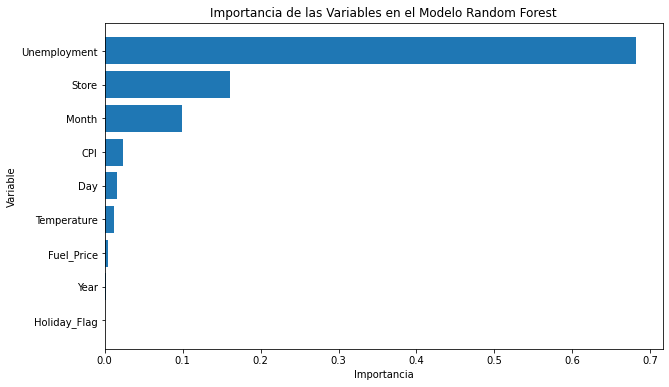

In [273]:
# Visualizar las variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Variable'], importancias_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más importante en la parte superior
plt.show()

Respecto al grafico resultando las variables que tienen mayor valor explicativo es:
- "unemplyment"
- "store"
- "Month"
